# Data Analysis Project on FIFA dataset

* #### The given data contains the data of 1500+ unique instances and has 13 columns
* #### The data will be cleaned and plotted as per required for understanding and will be made ready further use

In [1]:
# Importing all libraries that will be required for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Making a dataframe from the given data

df = pd.read_csv("/home/smayan/Desktop/Smayan_Kulkarni_S4DS/Smayan_Kulkarni_S4DS/data/TASK2- DATA.csv")

In [3]:
# Getting a small view of the data

df.head(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,89,NaN,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar


In [4]:
# Understanding the statistical information in the dataset

df.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,1511,1497,1507,1498,1504,1508,1500,1500,1435,1500,1507,1475,1012
unique,22,21,53,852,2,7,174,72,5,108,54,12,159
top,14/15,LaLiga,Group Stage,1/27/13,H,FC Barcelona,Sevilla FC,3:OO,CF,9O,1:OO,Left-footed shot,Luis Suarez
freq,127,831,164,8,875,717,71,99,552,32,219,589,52


In [5]:
# Checking the rows and columns in the dataframe

df.shape

(1564, 13)

In [6]:
# Getting crucial information of the dataframe such as data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Minute            1500 non-null   object
 10  At_score          1507 non-null   object
 11  Type              1475 non-null   object
 12  Goal_assist       1012 non-null   object
dtypes: object(13)
memory usage: 159.0+ KB


In [7]:
# Checking the data types in the dataframe

df.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
dtype: object

*  Here it is seen that even all numerical values are of object type, thus to perform any statistical analysis on them the feasible ones should be converted to integer or float type

In [8]:
df['Minute'].unique()

array(['31', '89', '9', '26', '22', '64', '81', nan, '36', '63', '59',
       '32', '87', '68', '74', '55', '11', '86', '8O', '51', '85', '49',
       '45', '3O', '88', '53', '76', '72', '54', '42', '9O', '25', '39',
       '16', '28', '73', '12', '18', '45+1', '27', '44', '7O', '13', '71',
       '77', '82', '9O+1', '65', '78', '47', '75', '3', '37', '69', '8',
       '57', '61', '1O', '17', '21', '24', '41', '83', '23', '2', '33',
       '5', '58', '45+2', '43', '62', '2O', '46', '29', '4O', '48', '56',
       '6O', '38', '4', '9O+6', '15', '34', '9O+2', '52', '35', '66',
       '67', '19', '84', '1', '5O', '79', '6', '9O+4', '11O', '1O4',
       '9O+3', '12O', '97', '14', '7', '45+7', '1O3', '45+4', '9O+5',
       '1O9', '9O+7', '1O5'], dtype=object)

Here we can see that there are many values which are denoted as "90+1", denoting overtime
We must take care of such values and combine them to form a single integral time

In [9]:
df['Minute'].isnull().sum()

64

* Here we can see that many values under 'Minute' are null, we must take care of such values before diving deeper into optimizing the data

 * ####  To optimize the 'Minute' column as per the condition here, we will split the data into two columns, one for before the '+' and one for after '+' then we will convert those columns to integer type and add them to have a final 'Main_Time' value

In [10]:
# Splitting the data
df[['time1','time2']]=df['Minute'].str.split('+', expand=True)


In [11]:
# Filling all NaN values
df['time2']=df['time2'].fillna(0)
df['time1']=df['time1'].fillna(0)

In [12]:
# Checking all unique values in the columns to check possibility of non numeric instances
df['time2'].unique(),df['time1'].unique()

(array([0, '1', '2', '6', '4', '3', '7', '5'], dtype=object),
 array(['31', '89', '9', '26', '22', '64', '81', 0, '36', '63', '59', '32',
        '87', '68', '74', '55', '11', '86', '8O', '51', '85', '49', '45',
        '3O', '88', '53', '76', '72', '54', '42', '9O', '25', '39', '16',
        '28', '73', '12', '18', '27', '44', '7O', '13', '71', '77', '82',
        '65', '78', '47', '75', '3', '37', '69', '8', '57', '61', '1O',
        '17', '21', '24', '41', '83', '23', '2', '33', '5', '58', '43',
        '62', '2O', '46', '29', '4O', '48', '56', '6O', '38', '4', '15',
        '34', '52', '35', '66', '67', '19', '84', '1', '5O', '79', '6',
        '11O', '1O4', '12O', '97', '14', '7', '1O3', '1O9', '1O5'],
       dtype=object))

In [13]:
df.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
time1               object
time2               object
dtype: object

* #### From here we conclude that 'time1' and 'time2' may contain non numeric values, those values are handled below before converting them into integer type

In [14]:
df['time1']=df['time1'].astype(str)
df['time2']=df['time2'].astype(str)

In [15]:
non_numeric1 = df[~df['time1'].str.isnumeric()]
non_numeric2 = df[~df['time2'].str.isnumeric()]

In [16]:
df['time1'] = pd.to_numeric(df['time1'], errors='coerce')
df['time2']=pd.to_numeric(df['time2'],errors='coerce')

In [17]:
df['time2'].unique()

array([0, 1, 2, 6, 4, 3, 7, 5])

In [18]:
df['time1'] = df['time1'].astype(float)
df['time2']=df['time2'].astype(float)

In [19]:
df.dtypes

Season               object
Competition          object
Matchday             object
Date                 object
Venue                object
Club                 object
Opponent             object
Result               object
Playing_Position     object
Minute               object
At_score             object
Type                 object
Goal_assist          object
time1               float64
time2               float64
dtype: object

* 'time1' and 'time2' have been converted to integer type, now we can create a final column and drop the unnecessary ones

In [20]:
df['Main_Time'] = df['time1']+df['time2']
type(df['Main_Time'][0])

numpy.float64

In [21]:
df.drop(['time1','time2','Minute'], axis=1,inplace=True)

In [22]:
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,At_score,Type,Goal_assist,Main_Time
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,1:O1,Direct free kick,NaN,31.0
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN,NaN,NaN,89.0
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,1:OO,Header,Javier Mascherano,9.0
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,2:O1,Right-footed shot,Xabi Alonso,26.0
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,O:1,Left-footed shot,Neymar,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,2O/21,Serie A,36,O5-12-21,A,Juventus FC,US Sassuolo,1:O3,CF,O:O2,Left-footed shot,NaN,45.0
1560,Dec-13,UEFA Champions League,Group Stage,1O-O3-12,A,Real Madrid,Ajax Amsterdam,1:O4,LW,1:O3,Right-footed shot,Karim Benzema,79.0
1561,14/15,LaLiga,22,O2/O8-15,A,FC Barcelona,Athletic Bilbao,2:O5,RW,O:O1,Direct free kick,NaN,15.0
1562,2O/21,Serie A,27,3/14/21,A,Juventus FC,Cagliari Calcio,1:O3,CF,O:O3,Left-footed shot,Federico Chiesa,32.0


## Understanding the Amount of null values in the DataFrame

In [23]:
df.isnull().sum()

Season               53
Competition          67
Matchday             57
Date                 66
Venue                60
Club                 56
Opponent             64
Result               64
Playing_Position    129
At_score             57
Type                 89
Goal_assist         552
Main_Time           217
dtype: int64

In [30]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_checking=['Goal_assist', 'Main_Time','Playing_Position']
null_percentage = get_null_percentages(df, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")



Goal_assist: 35.29%
Main_Time: 13.87%
Playing_Position: 8.25%


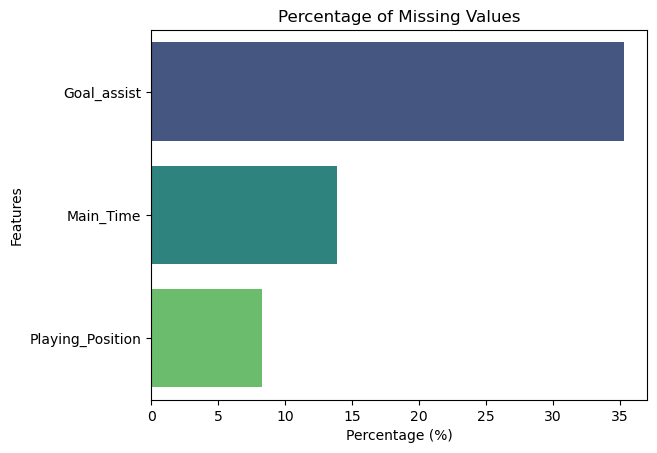

In [32]:
sns.barplot(data=null_percentage, x=null_percentage.values(), y=null_percentage.keys(), palette='viridis', hue=null_percentage.keys()).set(title="Percentage of Missing Values", xlabel="Percentage (%)", ylabel="Features")
plt.show()

* #### Here Goal Assist is the name of the player who has assisted in scoring the goal, so using a process to fill the value of the empty instance wont make sense, it could make sense to make it a target variable and then while taking Competition, Match Day, Club and Playing Position it can be predicted with some accuracy who the player could be in the given empty instance.
* #### Here Main_Time is the time at which most goals have been scored, the values in this column can be filled by a statistical method. 
* #### Here Playing_Position has a null percentage of less than 10% so we need not perform deep analysis into this column.